In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import random

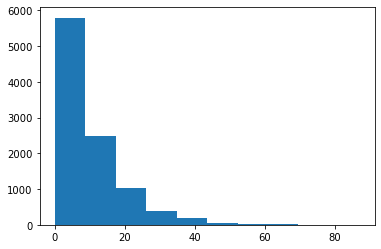

In [13]:
plt.hist(np.round(st.expon.rvs(0, 10, size = 10000)));

In [24]:
def poissonprocess(size = 1):

    n = np.random.uniform(0, 1, size = size)
    return  -np.log(1.0 - n) / (1/10)

In [22]:
W = [poissonprocess()[0] for i in range(100000)]

In [23]:
np.mean(W)

0.09969046827192218

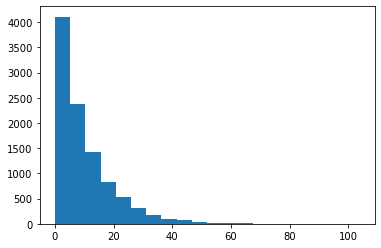

In [14]:
plt.hist(W, bins = 20);

In [16]:
def queuing():
    
    next_patient = 0
    open_time = 0
    time = 0
    patient_arrival_time = 0
    patients = [round(poissonprocess()[0])]
    doctors = np.array([True, True, True])
    time_finish_app = np.array([0.0,0.0,0.0])
    next_patient_arrival = 0
    patients_waiting = 0
    waiting_time = []
    while next_patient_arrival <= 420:
    
        if np.any(doctors) == False: # and 
            #print('Doctors busy!')
            # If doctors are busy, patient_arrival_time is equal to the time the the first appoinment finished
            patients_waiting += 1
            patient_arrival_time += patients[next_patient]
            patient_entry_to_app = np.min(time_finish_app) + 1
            waiting_time.append(patient_entry_to_app - patient_arrival_time)
            # The doctor who finishes first his appoinment gets unoccupied
            doctors[np.argmin(time_finish_app)] = True
            # Add arrival time for the next patient
            patients.append(round(poissonprocess()[0]))
            time_with_doctor = randint.rvs(5, 20, size = 1)[0]
            # Time at the end of the appoinment
            time =  patient_entry_to_app + time_with_doctor
            # which doctor is free
            doctor = np.argwhere(doctors == True)[0][0] 
            
            next_patient += 1
            next_patient_arrival =  patient_arrival_time + patients[next_patient]
        
            if next_patient_arrival < time:
                doctors[doctor] = False
                time_finish_app[doctor] = time
            else:
                doctors[doctor] = True
                time_finish_app[doctor] = 0
                
            # If doctors finish appoinments before the arrival of the next patient they become free again   
            time_finish_app = np.where(time_finish_app < next_patient_arrival, 0, time_finish_app)
            doctors = np.where(time_finish_app == 0, True, False)

        else:
            patients.append(round(poissonprocess()[0]))
            time_with_doctor = randint.rvs(5, 20, size = 1)[0]
            patient_arrival_time += patients[next_patient]
            time =  patient_arrival_time + time_with_doctor
            doctor = np.argwhere(doctors == True)[0][0] 
        
            next_patient += 1
            next_patient_arrival =  patient_arrival_time + patients[next_patient]
        
            if next_patient_arrival <= time:
                doctors[doctor] = False
                time_finish_app[doctor] = time
            else:
                doctors[doctor] = True
                time_finish_app[doctor] = 0
            
            time_finish_app = np.where(time_finish_app < next_patient_arrival, 0, time_finish_app)
            doctors = np.where(time_finish_app == 0, True, False)
            #print('Time:', time, (patient_arrival_time, time_with_doctor),'Next patient:', next_patient_arrival, 'Free doctors:', time_finish_app)
  
    if len(waiting_time) > 0: 
        Average_waiting_time = sum(waiting_time) / len(waiting_time)
    else:
        Average_waiting_time = 0
        
    return next_patient + 1, patients_waiting, Average_waiting_time, max(420, time)


In [27]:
for i in range(1):
    tot_patients, patients_waiting, waiting_time_avg, closing_time = queuing()
    print(tot_patients, patients_waiting, waiting_time_avg, closing_time)

21 1 1.0 420


In [18]:
patients, pat_waiting, avg_waiting, finish_time = [], [], [], []
results = {'patients': [], 'pat_waiting': [], 'avg_waiting': [], 'finish_time': []}
for i in range(100):
    tot_patients, patients_waiting, waiting_time_avg, closing_time = queuing()
    results['patients'].append(tot_patients)
    results['pat_waiting'].append(patients_waiting)
    results['avg_waiting'].append(waiting_time_avg)
    results['finish_time'].append(closing_time)

In [21]:
for i in ['patients', 'pat_waiting', 'avg_waiting', 'finish_time']:
    print(i, 'mean: ', np.mean(np.array(results[i])))
    print(i, 'median: ', np.median(np.array(results[i])))
    print(i, '50 interval: ', t.interval(0.5, len(results[i])-1, loc=np.mean(np.array(results[i])), scale= sem(np.array(results[i]))))
    print('')

patients mean:  42.47
patients median:  42.0
patients 50 interval:  (42.05020044805901, 42.88979955194099)

pat_waiting mean:  5.51
pat_waiting median:  5.0
pat_waiting 50 interval:  (5.22302608715804, 5.79697391284196)

avg_waiting mean:  4.3414315545565545
avg_waiting median:  4.180555555555555
avg_waiting 50 interval:  (4.190777256577915, 4.492085852535194)

finish_time mean:  426.64
finish_time median:  425.0
finish_time 50 interval:  (426.22185061925524, 427.05814938074474)



In [17]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Wed Aug 10 2022

Python implementation: CPython
Python version       : 3.9.1
IPython version      : 7.26.0

matplotlib: 3.4.2
numpy     : 1.20.2
scipy     : 1.6.2

Watermark: 2.2.0

